# Sentiment Analysis in Python
Sentiment analysis aims to determine a writer’s attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgment or assessment, his emotional state or the intended emotional communication.

In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.

# Read in Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data=pd.read_csv("Train1.csv")
data.head()

,text,label
0,I bought my Kindle about 2 months ago and the ...,0.0
1,Good product for child. Who only need to read ...,1.0
2,Loved it!,1.0
3,Does not work all the time,0.0
4,Love the simplicity. Also love that I use it f...,1.0


In [3]:

data.shape

(29, 2)

In [4]:
data['label'].value_counts()

1.0    16
0.0    12
Name: label, dtype: int64

<AxesSubplot:>

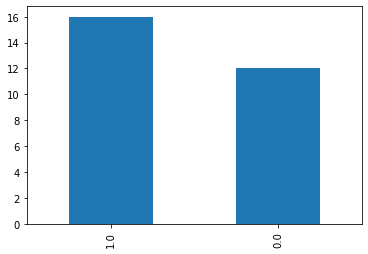

In [5]:

data['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

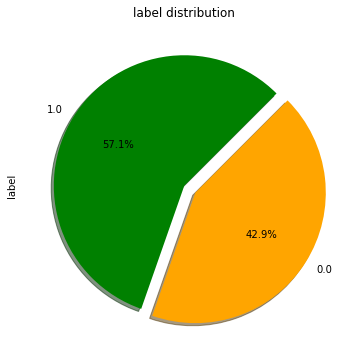

In [6]:

plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['label'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

In [7]:
data['text'][1]

'Good product for child. Who only need to read the books'

# Cleaning steps
removing HTML Tags
extracting emojies # The pattern re.compile('(?::|;|=)(?:-)?(?:)|(|D|P)') is a regular expression used to match and extract emojis from a given text.
removing special chars,puntuation,sumbols
lower casing
removing stopwords
tokenization

In [8]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [9]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [10]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [11]:

data['text'] = data['text'].apply(lambda x: preprocessing(x))

In [12]:
data['text']

0     bought kindl 2 month ago batteri alreadi dead ...
1                     good product child need read book
2                                                  love
3                                             work time
4     love simplic also love use read download distr...
5                    amazon kindl light weight easi use
6                      love even turn tv talk alex tell
7                thank display version alexa love model
8     sound qualiti good especi price pay would reco...
9                                               perfect
10                                            love echo
11                                      love littl much
12    sometim play game answer question correctli al...
13    lot fun thing 4 yr old learn dinosaur control ...
14    äôt set yet realli look forward use regular al...
15    would recommend get echo dot buy better speake...
16                                         hell product
17    return piec garbag soon possibl lifexcel p

# Visualizing Negative and Positive Words

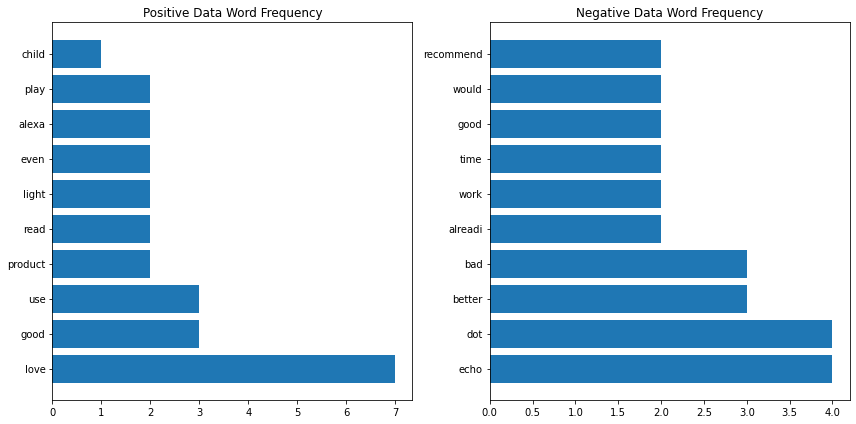

In [13]:
positivedata = data[data['label'] == 1]
positivedata = positivedata['text']
negdata = data[data['label'] == 0]
negdata = negdata['text']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

# TF-IDF Vertorizer to convert the raw documents into feature matrix

In [14]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

# Training Machine Learning Model for Sentiment Analysis

Now to train a machine learning model I will split the data into 50 percent training and 50 percent test sets:

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [16]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Accuracy

In [ ]:

import numpy as np

# Replace NaN and infinity values with zeros
y_test = np.nan_to_num(y_test)
y_pred = np.nan_to_num(y_pred)

# Now, you can calculate the accuracy score without encountering the ValueError
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


# Pickle files

In [ ]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

# prediction

In [ ]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction('Good product for child. Who only need to read the books')


In [ ]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")
    

In [ ]:
data['text'][5]

In [ ]:
data['text'][0]